In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/amazon-product-reviews-dataset/7817_1.csv


In [2]:
df = pd.read_csv('/kaggle/input/amazon-product-reviews-dataset/7817_1.csv')

In [4]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [5]:
amazonrev = df[['reviews.rating','reviews.text']]

In [6]:
amazonrev

,reviews.rating,reviews.text
0,5.0,I initially had trouble deciding between the p...
1,5.0,Allow me to preface this with a little history...
2,4.0,I am enjoying it so far. Great for reading. Ha...
3,5.0,I bought one of the first Paperwhites and have...
4,5.0,I have to say upfront - I don't like coroporat...
...,...,...
1592,3.0,This is not the same remote that I got for my ...
1593,1.0,I have had to change the batteries in this rem...
1594,1.0,"Remote did not activate, nor did it connect to..."
1595,3.0,It does the job but is super over priced. I fe...


In [8]:
amazonrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  1177 non-null   float64
 1   reviews.text    1597 non-null   object 
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [7]:
amazonrev.isnull().sum()

reviews.rating    420
reviews.text        0
dtype: int64

In [10]:
amazonrev['reviews.rating'].value_counts(dropna=False)

5.0    741
NaN    420
4.0    236
3.0    124
1.0     42
2.0     34
Name: reviews.rating, dtype: int64

In [11]:
# Preprocessing on text data.
amazonrev['reviews.text'] = amazonrev['reviews.text'].str.lower()

/tmp/ipykernel_32/1718334660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonrev['reviews.text'] = amazonrev['reviews.text'].str.lower()


In [12]:
amazonrev.head()

,reviews.rating,reviews.text
0,5.0,i initially had trouble deciding between the p...
1,5.0,allow me to preface this with a little history...
2,4.0,i am enjoying it so far. great for reading. ha...
3,5.0,i bought one of the first paperwhites and have...
4,5.0,i have to say upfront - i don't like coroporat...


In [13]:
# Step 2) Removing punctuation, special character.

import re

def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [14]:
amazonrev['reviews.text'] = [str(clean_txt(x)) for x in amazonrev['reviews.text']]

/tmp/ipykernel_32/4053452382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonrev['reviews.text'] = [str(clean_txt(x)) for x in amazonrev['reviews.text']]


In [20]:
# Step 3) Removing stop words

nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop_words = set(stopwords.words("english"))

In [22]:
amazonwords = amazonrev['reviews.text'].str.split()

In [23]:
wordcloud = WordCloud(height=500, width = 1000, stopwords=stop_words).generate(str(amazonrev))

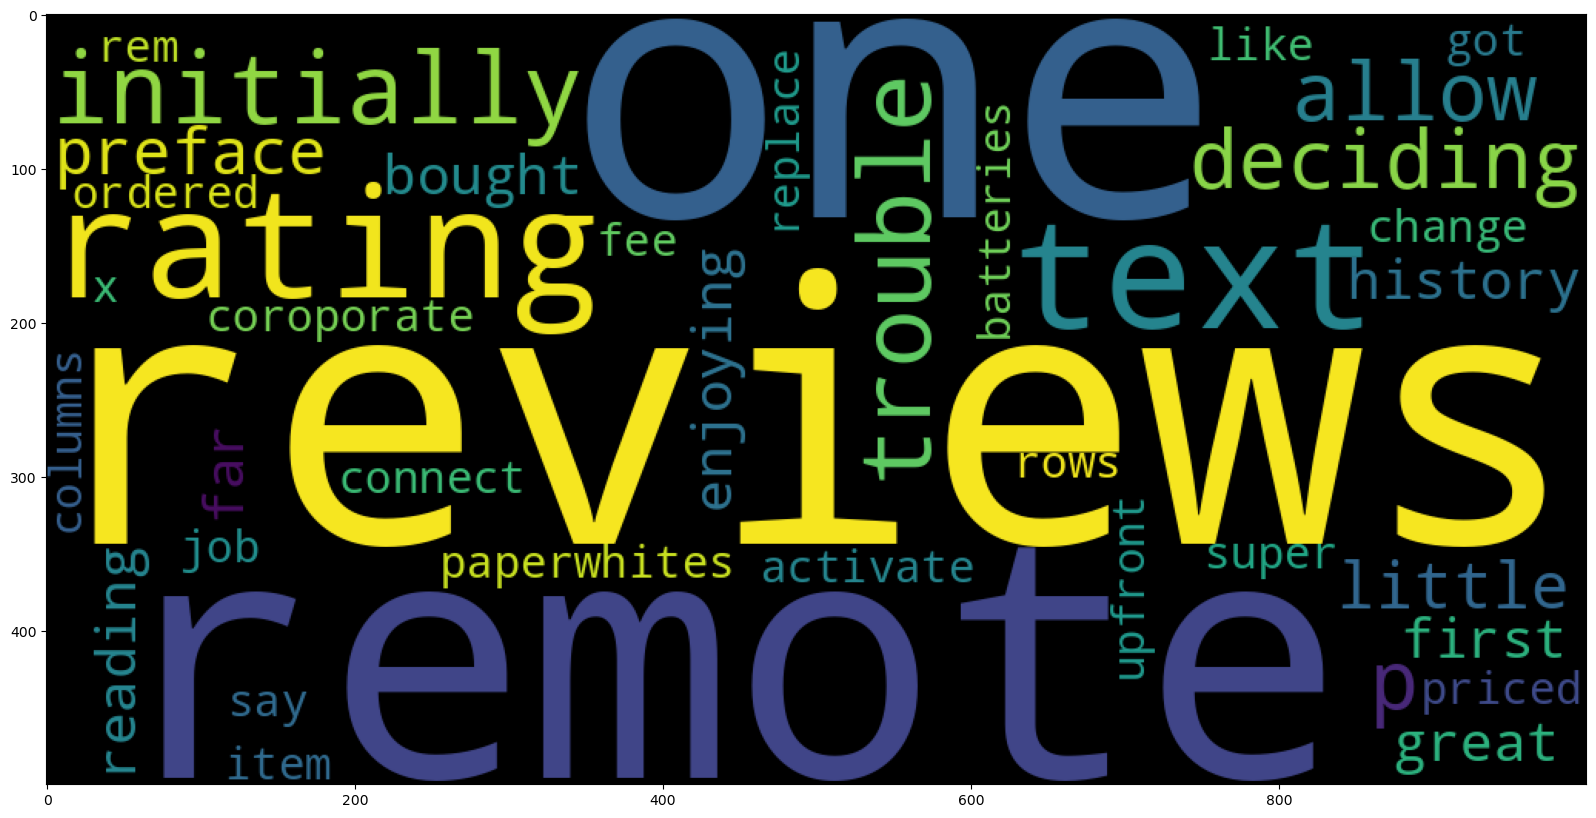

In [24]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [25]:
amazonwords = amazonwords.to_list()

In [27]:
from nltk import flatten
from nltk.probability import FreqDist

In [28]:
amazonwords = flatten(amazonwords)

In [30]:
amazonwords = [w for w in amazonwords if len(w) > 2]

In [31]:
amazonwords = [w for w in amazonwords if not w in stop_words]

In [32]:
FreqDist(amazonwords).most_common(10)

[('kindle', 1523),
 ('amazon', 1516),
 ('fire', 1399),
 ('like', 1247),
 ('use', 951),
 ('one', 905),
 ('read', 887),
 ('sound', 844),
 ('great', 814),
 ('headphones', 814)]

In [33]:
wordcloud = WordCloud(height=500, width = 1000, stopwords = stop_words).generate(str(amazonwords))

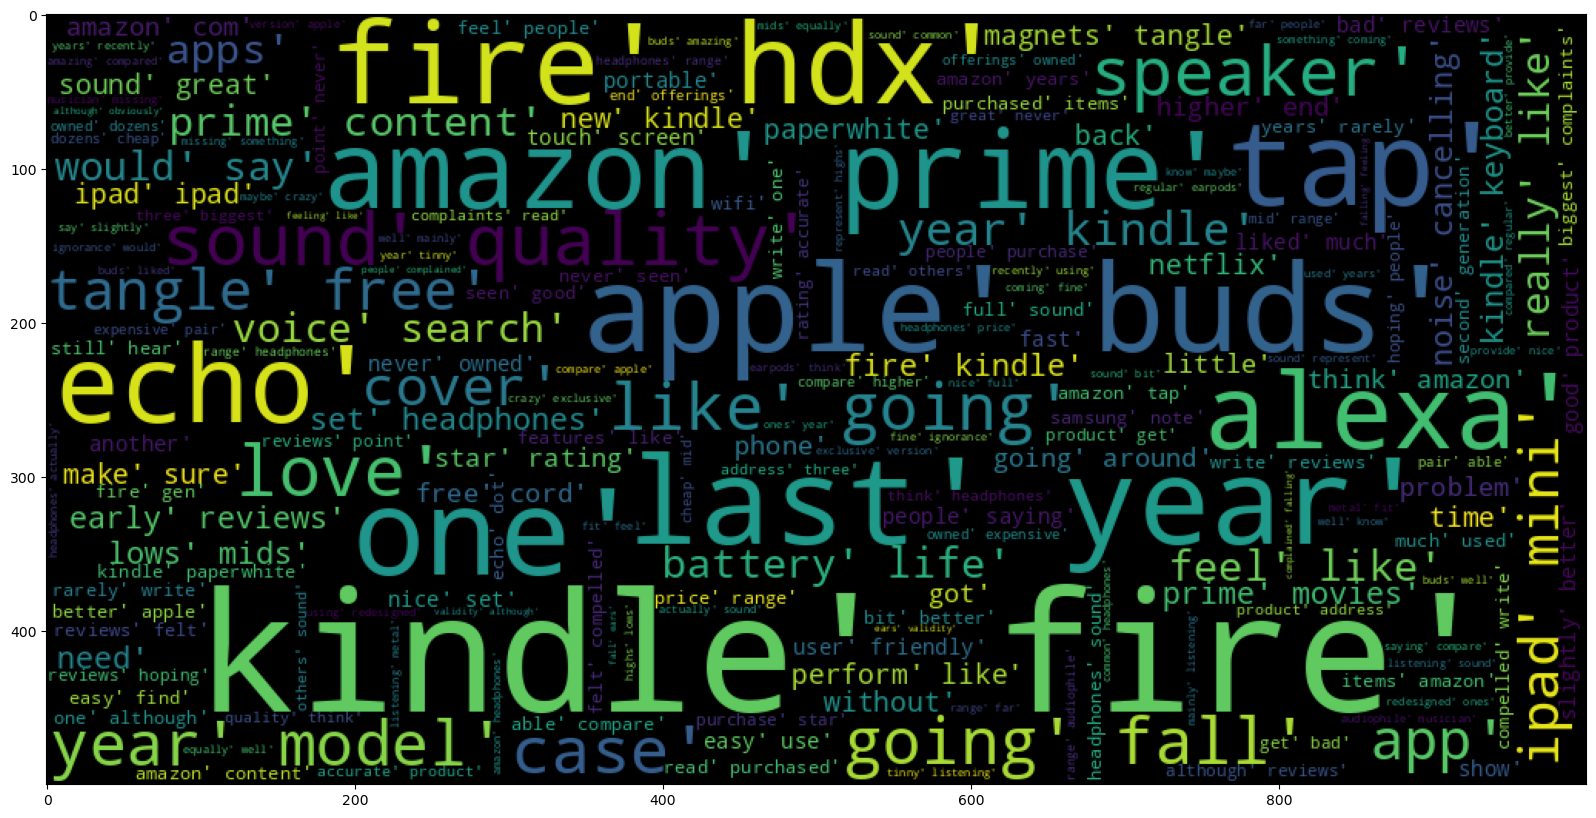

In [34]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [42]:
from sklearn.feature_extraction import TfidfVectorizer

ImportError: cannot import name 'TfidfVectorizer' from 'sklearn.feature_extraction' (/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/__init__.py)

In [37]:
amazonrev['reviews.text'] = amazonrev['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

/tmp/ipykernel_32/2829978748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonrev['reviews.text'] = amazonrev['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))


In [38]:
amazonrev['reviews.text'] = amazonrev['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if len(x) > 2]))

/tmp/ipykernel_32/2361984034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonrev['reviews.text'] = amazonrev['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if len(x) > 2]))


In [40]:
tfidf = TfidfVectorizer(max_features = 30, ngram_range=(1,2), stop_words="english")

NameError: name 'TfidfVectorizer' is not defined